<a href="https://colab.research.google.com/github/ash260498/-Datascience/blob/main/Ted_talks_views_prediction_Aswathi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Ted Talks Views Prediction- Regression



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Aswathi Rajesh


# **Project Summary -**

This project aims to develop a regression model to predict the number of views a TED Talk video will receive based on various features. TED Talks is a popular platform for sharing ideas and knowledge through short, powerful presentations. By accurately predicting the views of a TED Talk, we can gain insights into the factors that contribute to video popularity and help content creators, organizers, and viewers understand the dynamics of engagement.

# **GitHub Link -**

https://github.com/ash260498/-Datascience/blob/main/Ted_talks_views_prediction_Aswathi.ipynb

# **Problem Statement**


**The problem we aim to address in this project is to develop a regression model that can accurately predict the number of views a TED Talk video will receive based on various features. TED Talks is a widely popular platform for sharing inspiring ideas and knowledge through concise presentations. By predicting the number of views, we can gain insights into the factors that contribute to video popularity and assist content creators, organizers, and viewers in understanding the dynamics of engagement.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Load Dataset
file_path = '/content/drive/MyDrive/AlmaBetter/Regression/data_ted_talks.csv'
ted_talks = pd.read_csv(file_path)

### Dataset First View

In [4]:
# Dataset First Look
ted_talks.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
ted_talks.shape

(4005, 19)

### Dataset Information

In [6]:
# Dataset Info
ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
ted_talks.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

<Axes: >

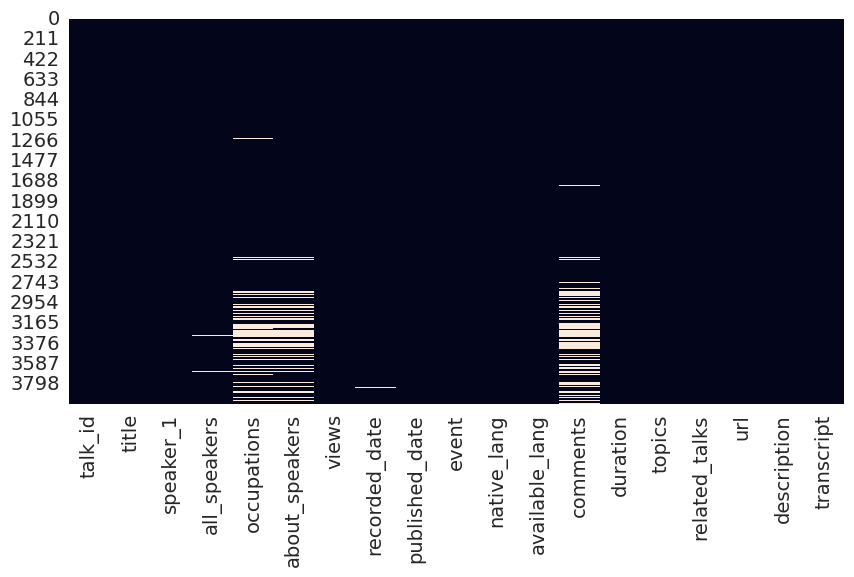

In [9]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(ted_talks.isnull(), cbar=False)

### What did you know about your dataset?

These datasets contain over 4000 TED talks including transcripts in many languages.As of 2015 TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
ted_talks.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [11]:
# Dataset Describe
ted_talks.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


### Variables Description

talk_id: A unique identifier for each TED Talk video.

title: The title of the talk.

speaker_1: The primary speaker for the talk.

all_speakers: A list of all the speakers for the talk.

occupations: The occupations of the speakers.

about_speakers: Information about the speakers, such as their backgrounds and expertise.

views: The number of views the video has received.

recorded_date: The date the talk was recorded.

published_date: The date the talk was published on the TED Talks YouTube channel.

event: The name of the TED event where the talk was given.

native_lang: The language the talk was given in.

available_lang: The languages the talk is available in.

duration: The length of the video.(in sec.)

topics: The topics covered in the talk.

related talks: Other TED Talks that are related to this talk.

url: The URL of the video.

description: A brief description of the talk.

transcript: A transcript of the talk.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
ted_talks['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

In [13]:
ted_talks.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99])

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
80%,24402.600000,2.475286e+06,227.000000,1020.000000
85%,32189.400000,3.019490e+06,275.000000,1072.000000
90%,44241.800000,3.994610e+06,351.100000,1133.000000


the minimum value of views is 0.
the minimum value of comments is also 0.
outliers in views, comments and duration columns.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# find rows where column views have 0 value
ted_talks[ted_talks['comments']==0.0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3893,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,https://www.ted.com/talks/jon_gray_the_power_o...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,..."
3898,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",https://www.ted.com/talks/yves_behar_how_surfb...,Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...


total 2 rows are present where views = 0 and columns = NaN. this is MCAR data (missing completely at random) so we can remove this rows. because this is impossible that the views of video are 0 on TEDx Website.

total 655 NaN values present in comments column so we have to fill that value also.

In [16]:
ted_talks.describe(include='O').T

,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


there are two column with same name and details, i.e. speaker_1, all_speakers. So, one of the column is to be deleted.

### What all manipulations have you done and insights you found?

All Issues with the dataset
1. Dirty Data (Low quality data)
comments , occupations and about_speakers columns are high missing values...we have to fill 655 missing values of comments. completion issue(missing data)

incorrect data-type assigned to recorded_date , published_date , comments. validity issue(invalid data)
the minimum value of column views is 0 and there are total 2 rows. so we have to delete that rows. accuracy issue(not accurate values)
the minimum value of comments is also 0. there are only 2 rows there but null value in other 655 rows so simply fill with 0 but this column important so we fill values in feature engineering part. accuracy issue(not accurate values)
there are two column with same name and details, i.e. speaker_1, all_speakers. So, one of the column is to be deleted. accuracy issue(not accurate values)
url and talk_id column is also not useful in EDA so we deleted accuracy issue(not accurate values)

2. Messy Data (untidy data)

topics and available_lang are in list format. we have to split this untidy data for better feature corr with views. we perform this in feature transformation part.there are also few columns in dictionary untidy format occupations,about_speakers, related_talks but this columns are not important so in later feature transformation part we remove this columns if needed.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [17]:
# create data frame from original dataset
tedtalks_df = ted_talks.copy()

In [18]:
# fill missing value we focus more on feature engineering part.
values = {'comments':0, 'occupations':'no data', 'about_speakers': 'no data', 'all_speakers' : 'no data'}
tedtalks_df = tedtalks_df.fillna(value=values)

In [19]:
# no null values now, we more focus on comments column in later feature engineering part.
tedtalks_df.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [20]:
# change data-types of columns
tedtalks_df = tedtalks_df.astype({'comments':'int32', 'views':'int32', 'duration':'int32', 'talk_id':'int32'})
tedtalks_df['recorded_date']= pd.to_datetime(tedtalks_df['recorded_date'])
tedtalks_df['published_date']= pd.to_datetime(tedtalks_df['published_date'])

In [21]:
#datatype looks good now
tedtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         4005 non-null   int32         
 1   title           4005 non-null   object        
 2   speaker_1       4005 non-null   object        
 3   all_speakers    4005 non-null   object        
 4   occupations     4005 non-null   object        
 5   about_speakers  4005 non-null   object        
 6   views           4005 non-null   int32         
 7   recorded_date   4004 non-null   datetime64[ns]
 8   published_date  4005 non-null   datetime64[ns]
 9   event           4005 non-null   object        
 10  native_lang     4005 non-null   object        
 11  available_lang  4005 non-null   object        
 12  comments        4005 non-null   int32         
 13  duration        4005 non-null   int32         
 14  topics          4005 non-null   object        
 15  rela

In [22]:
# we drop all_speakers column because this column duplicate of speaker_1 and also drop url column
tedtalks_df.drop(['all_speakers', 'url', 'talk_id'], axis=1, inplace=True)

# rename column speaker_1 to speaker
tedtalks_df.rename(columns={'speaker_1': 'speaker'}, inplace=True)

In [23]:
tedtalks_df.sample(1)

,title,speaker,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
2004,How my mind came back to life — and no one knew,Martin Pistorius,"{0: ['author', 'designer']}","{0: 'At age 12, Martin Pistorius fell into a c...",2478498,2015-08-29,2015-10-01,TEDxKC,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",93,848,"['TEDx', 'brain', 'communication', 'health', '...","{1121: 'Remaking my voice', 1203: 'How languag...","Imagine being unable to say, ""I am hungry,"" ""I...","Imagine being unable to say, ""I am hungry,"" ""I..."


In [24]:
# we simply drop that 6 rows where value of views columns is 0. this is not possible 0 views in TEDx scenario (invalid data)
tedtalks_df = tedtalks_df[tedtalks_df['views']!=0]

In [25]:
# views column are now clear
print((tedtalks_df['views'] == 0).sum())

0


In [26]:
# remove columns
tedtalks_df.drop(['occupations', 'about_speakers', 'related_talks','description','transcript'], axis=1, inplace=True)

In [27]:
tedtalks_df.sample(1)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
2072,Capitalism will eat democracy -- unless we spe...,Yanis Varoufakis,2975357,2015-12-08,2016-01-25,TEDGlobal>Geneva,en,"['ar', 'bg', 'da', 'de', 'el', 'en', 'es', 'fa...",325,1191,"['activism', 'big problems', 'economics', 'dem..."


In [28]:
# find popular talk show titles and speakers based on views

pop_talk = tedtalks_df[['title', 'speaker', 'views']].sort_values('views', ascending=False)[0:15]
pop_talk

,title,speaker,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780


Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with 65.05 million views.
Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).
Robinson's talk is closely followed by Amy Cuddy's talk on Your Body Language May Shape Who You Are.
There are only 3 talks that have surpassed the 50 million mark and 12 talks that have crossed the 30 million mark.

#### Chart - 1

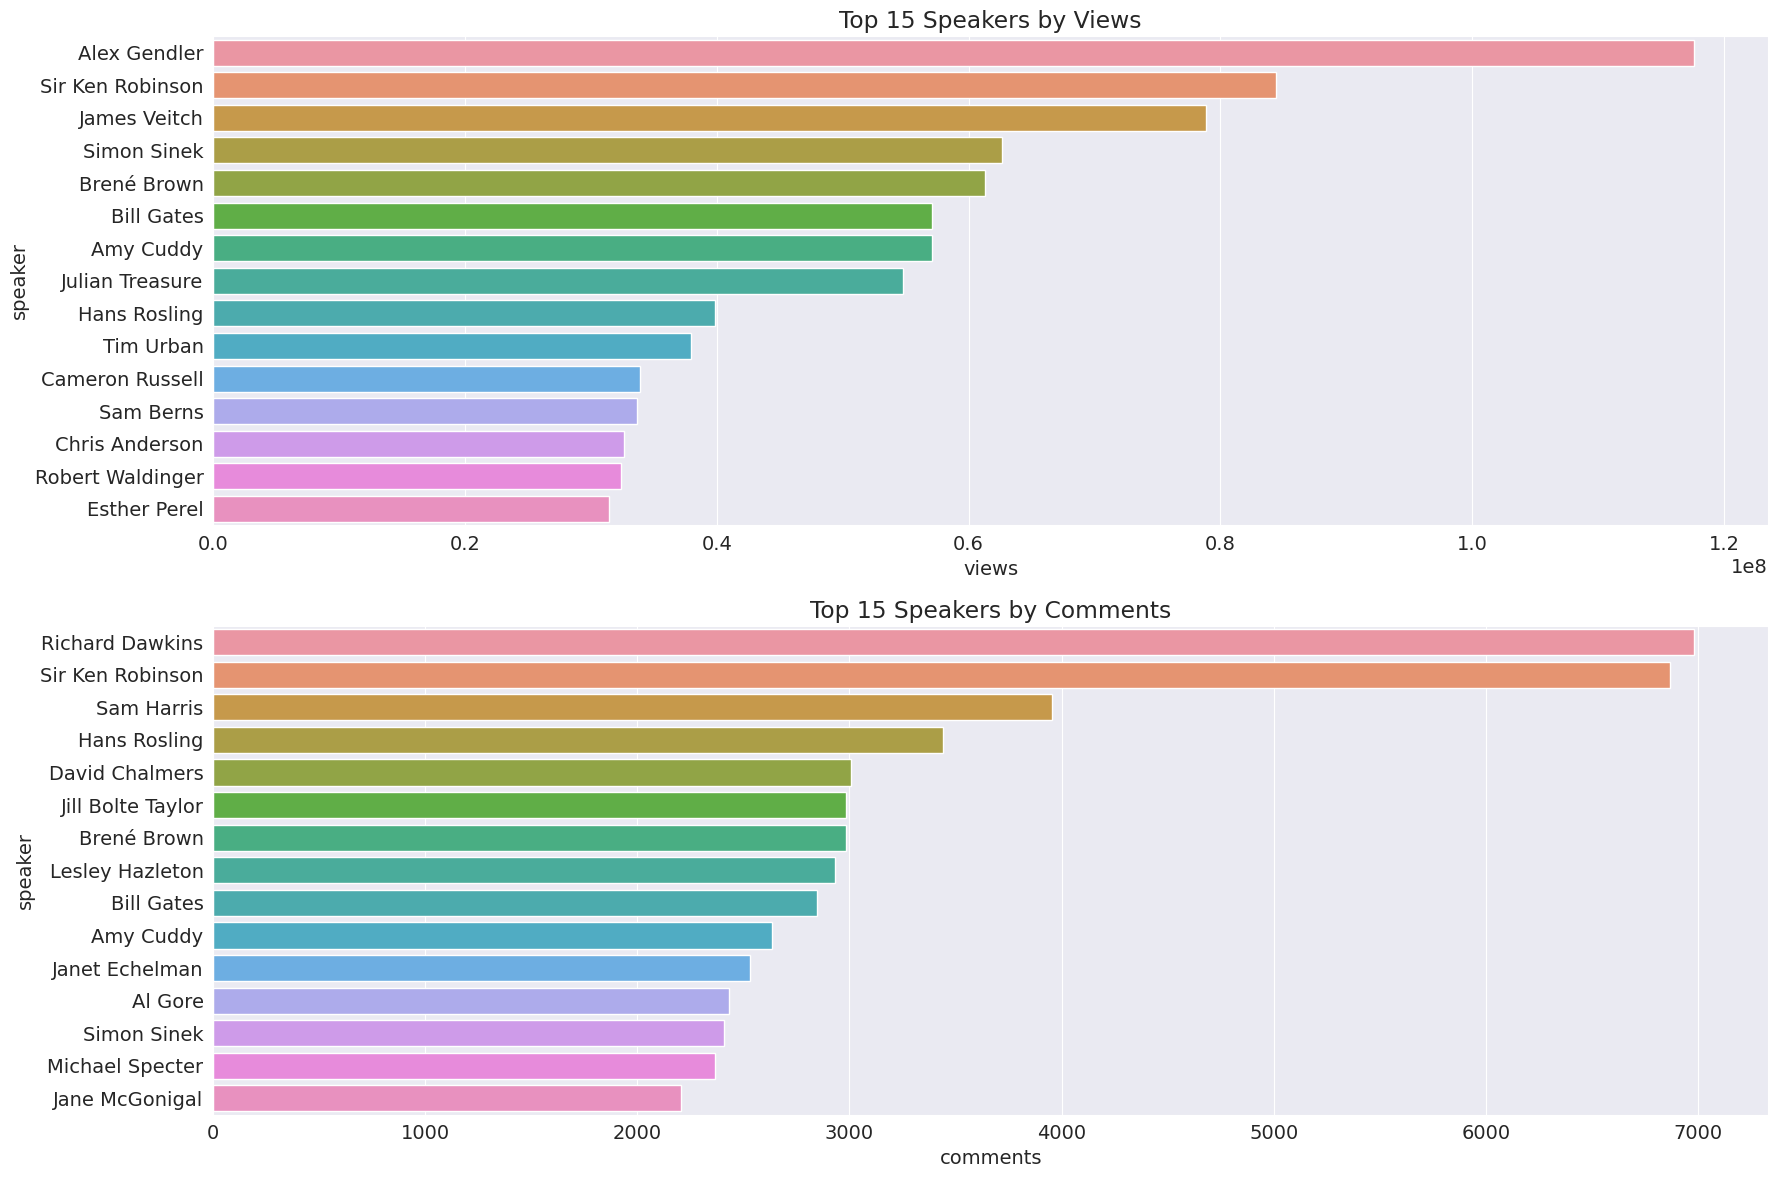

In [32]:
# create a dataframe with top 15 speakers by views
top15_views = tedtalks_df.groupby('speaker').views.sum().nlargest(15)
top15_views = top15_views.reset_index()

# create a dataframe with top 15 speakers by comments
top15_comments = tedtalks_df.groupby('speaker').comments.sum().nlargest(15)
top15_comments = top15_comments.reset_index()

# create the figure and subplots
fig, axs = plt.subplots(2,1, figsize=(18,12))

# create a barplot with top 15 speakers by views
sns.barplot(x='views', y='speaker', data=top15_views, ax=axs[0])
axs[0].set_title('Top 15 Speakers by Views')

# create a barplot with top 15 speakers by comments
sns.barplot(x='comments', y='speaker', data=top15_comments, ax=axs[1])
axs[1].set_title('Top 15 Speakers by Comments')


plt.tight_layout()
plt.show()


In [33]:
len(tedtalks_df['speaker'].unique())

3271

##### 1. Why did you pick the specific chart?

It creates two bar plots to visualize the top 15 speakers by views and comments in a TED Talks dataset.

##### 2. What is/are the insight(s) found from the chart?

in top 15 most popular speakers by views and comments there are total 6 speakers are same in both categories.
i think we add new categorical column using speakers by popularity wise categorical column ex. good,avg,high,extreme popular using cooments and views column but after perform feature engineering. (outliers, null values etc...)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The figure contains two subplots, each representing one bar plot. The first subplot shows the top 15 speakers by views, and the second subplot shows the top 15 speakers by comments. The x-axis represents the respective values (views or comments), and the y-axis represents the speaker names. The title of each subplot provides a clear description of the displayed information.

#### Chart - 2

In [34]:
# check skewness of our numerical columns
tedtalks_df.skew()

views       8.184312
comments    9.158308
duration    1.186224
dtype: float64

<Axes: xlabel='comments', ylabel='views'>

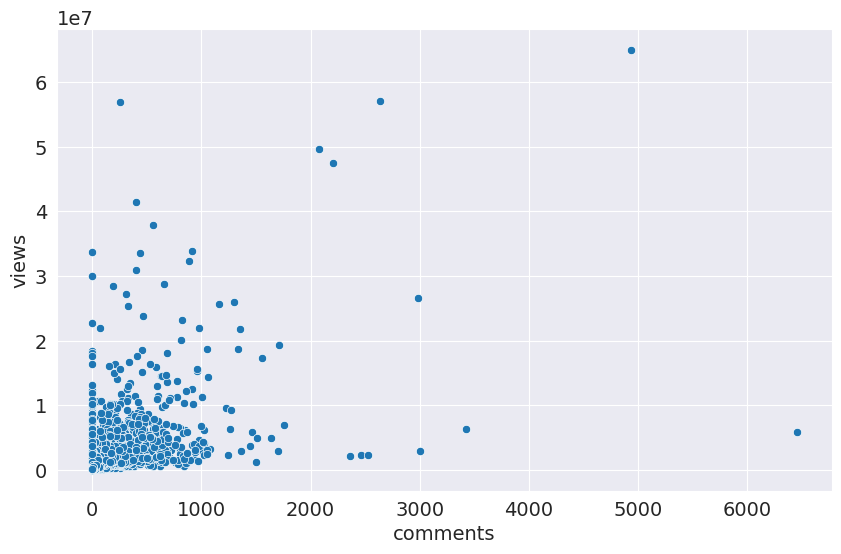

In [35]:
#chart 2 visualization code
#checking corr. with views column
plt.figure(figsize=(10,6))
sns.scatterplot(x='comments', y='views', data=tedtalks_df)

##### 1. Why did you pick the specific chart?

The scatter plot is used to visualize the relationship between the 'comments' and 'views' columns in the tedtalks_df DataFrame.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clear that comments and views both are rightly skewed and they both have somewhat of a similar distributions. This might signify some linear correlation.

Also as previously seen comments have a lot of NaN values and also distribution is highly skewed to the right side indicating some outliers. So lets deal with those issues too.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here are some potential insights that can be gained from this visualization:

Correlation: The scatter plot allows you to visually assess the correlation between the 'comments' and 'views' variables. If the points on the scatter plot are clustered around a linear pattern, it suggests a positive correlation between the two variables. A scattered or random pattern might indicate a weak or no correlation.

Outliers: By examining the scatter plot, you can identify any outliers or extreme values that deviate significantly from the general trend. Outliers might represent unique or exceptional cases that warrant further investigation.

Distribution: The scatter plot can give you an idea about the distribution of the data. For example, if the points are densely packed in a certain area, it suggests that the majority of the talks have a similar range of comments and views. On the other hand, if the points are widely spread, it indicates a wide range of variability in the data.

#### Chart - 3

<Axes: xlabel='comments', ylabel='Density'>

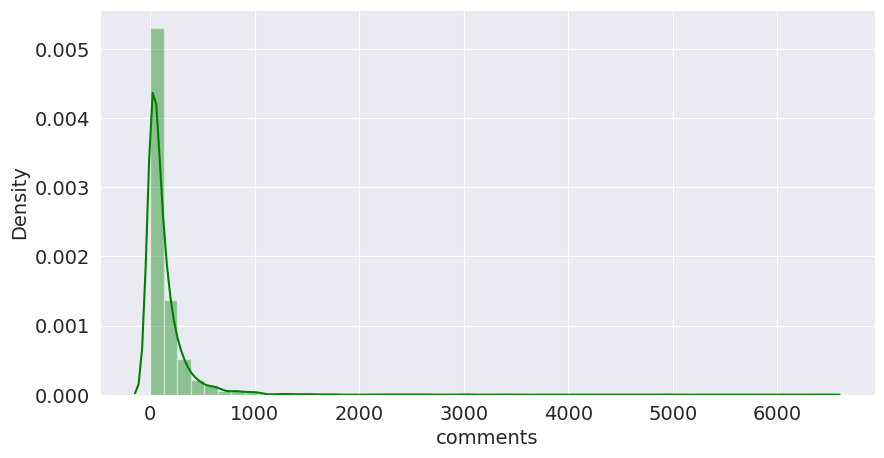

In [36]:
# Chart - 3 visualization code
# check distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot(tedtalks_df['comments'], color ='green')

##### 1. Why did you pick the specific chart?

The distribution plot (histogram) using the seaborn library to visualize the distribution of the 'comments' variable in the 'tedtalks_df' DataFrame.

##### 2. What is/are the insight(s) found from the chart?

the comments column is also highly right skew..we have to apply log transformation when we make pipeline. there are some outliers in this column we have to remove them or use some technique to fill that outliers with other values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The distribution plot helps us gain insights into the distribution and engagement patterns of the 'comments' variable, allowing us to make data-driven decisions and draw meaningful conclusions about the TED Talks dataset.

#### Chart - 4

In [37]:
print(len(tedtalks_df[tedtalks_df['comments'] > 1100]))

29


we can clearly see in graph and upper code also that there are only 29 values are outliers

In [38]:
#remove outliers of comments column

tedtalks_df.drop(tedtalks_df[tedtalks_df['comments'] > 1100].index, inplace=True)

In [39]:
tedtalks_df.shape

(3970, 11)

In [40]:
#fill null(0) value with median of column

tedtalks_df['comments']= tedtalks_df['comments'].replace(0, np.nan)
tedtalks_df["comments"].fillna(tedtalks_df["comments"].median(), axis = 0, inplace = True)

<Axes: xlabel='comments', ylabel='Density'>

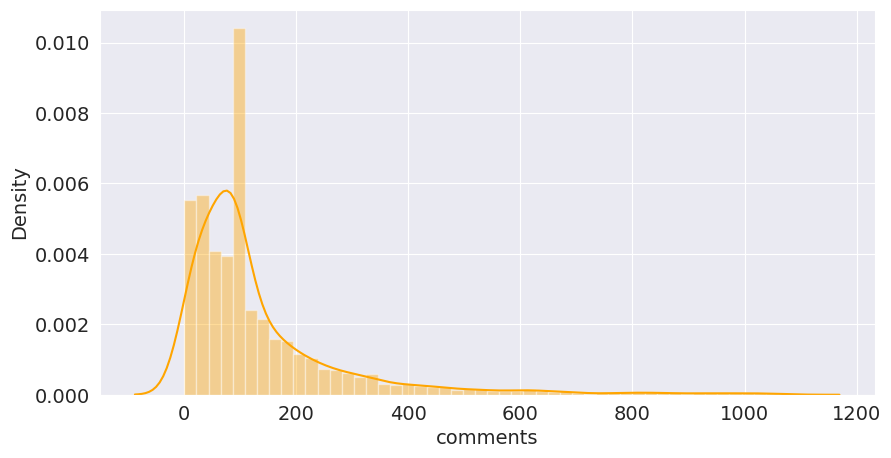

In [45]:
# Chart - 4 visualization code
# plot distplot after remove outliers and fill null values
plt.figure(figsize=(10,5))
sns.distplot(tedtalks_df['comments'], color ='orange')

##### 1. Why did you pick the specific chart?

We have created a distribution plot (using distplot from the seaborn library) for the 'comments' column in the tedtalks_df DataFrame.

##### 2. What is/are the insight(s) found from the chart?

after deal with outliers and null values now distribution of column comments are right skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The distribution plot of the 'comments' variable helps provide insights into the distribution of comments, detect outliers, identify missing values, and guide data preprocessing decisions before applying regression or other analytical techniques.

#### Chart - 5

<Axes: xlabel='views', ylabel='Density'>

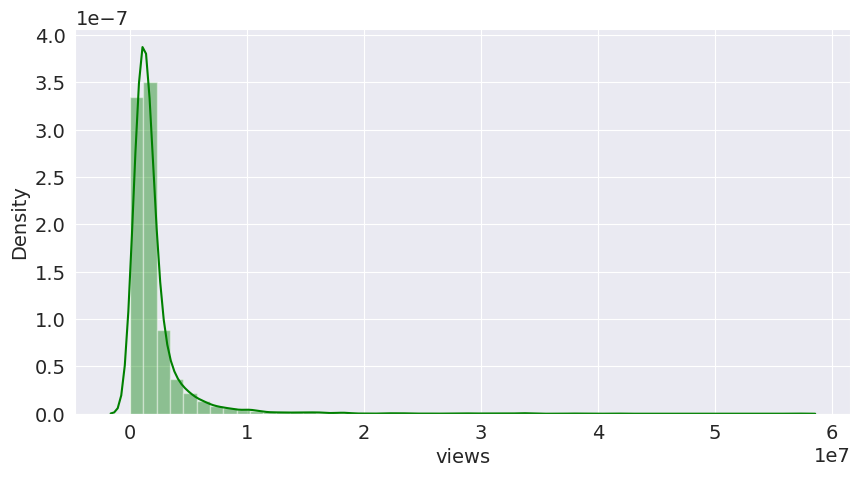

In [46]:
# Chart - 5 visualization code
# check distribution of views column
plt.figure(figsize=(10, 5))
sns.distplot(tedtalks_df['views'], color='green')

##### 1. Why did you pick the specific chart?

We have created a distribution plot (using distplot from the seaborn library) for the 'comments' column in the tedtalks_df DataFrame.

##### 2. What is/are the insight(s) found from the chart?

The views column is highly right skew..we have to apply log transformation when we make pipeline.
there are some outliers in this column we have to remove them or use some technique to fill that outliers with other values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The distribution plot provides an overview of the 'views' column's distribution, enabling us to understand the data, detect outliers, and make informed decisions during data analysis and modeling.

#### Chart - 6

<Axes: xlabel='duration', ylabel='Density'>

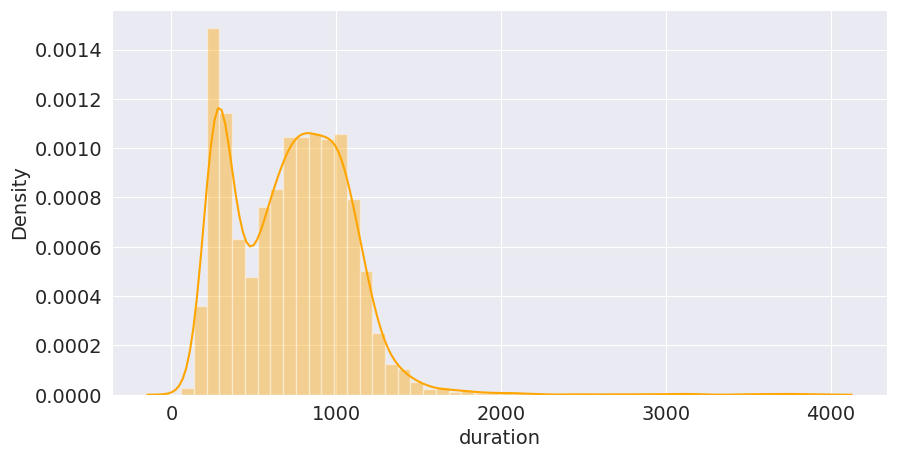

In [47]:
# check distribution of duration column

plt.figure(figsize=(10,5))
sns.distplot(tedtalks_df['duration'], color ='orange')

##### 1. Why did you pick the specific chart?

We have created a distribution plot (distplot) of the 'duration' column in the tedtalks_df DataFrame using the seaborn library.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: xlabel='duration', ylabel='views'>

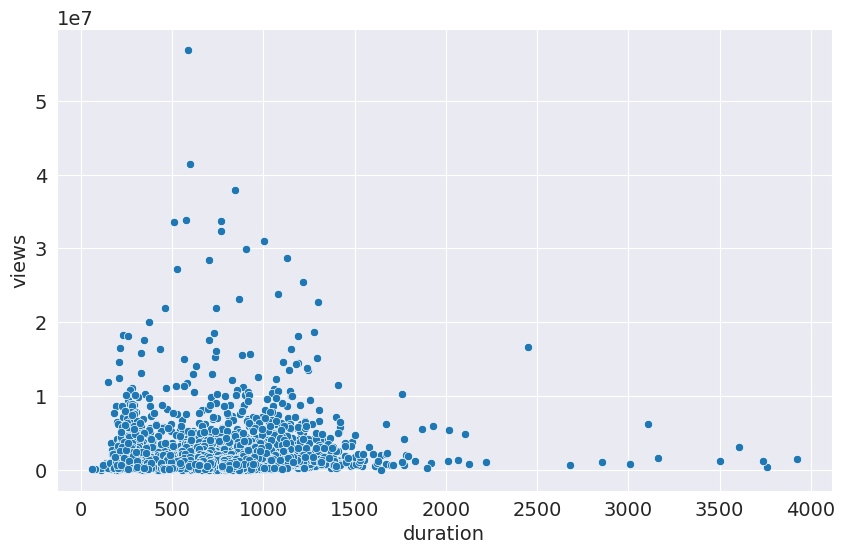

In [48]:
# Chart - 7 visualization code
# check correlation of duration and views using scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='views', data=tedtalks_df)

##### 1. Why did you pick the specific chart?

The scatter plot  which displays the relationship between the duration of TED Talks and the number of views, is used to visualize and understand the correlation between these two variables.

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clear that duration and views columns are not correlated to each other.

in duration column also some outlier there.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The scatter plot helps in exploring and visualizing the relationship between duration and views, providing insights into audience preferences and guiding decision-making processes.

#### Chart - 8

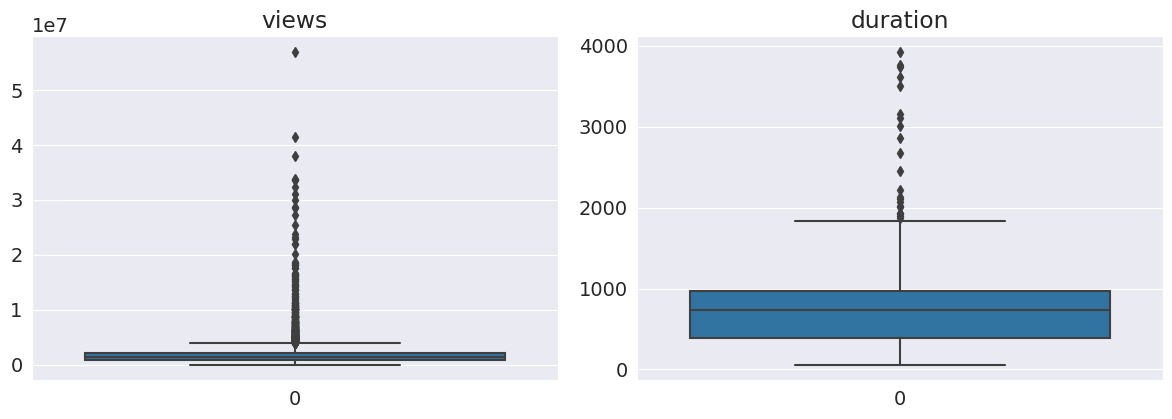

In [49]:
# Chart - 8 visualization code
# checking duration and views columns Outliers using boxplot

columns = ['views', 'duration']
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(tedtalks_df[i])
  plt.title(i)
  plt.tight_layout()

In [50]:
# treatment outliers by mean

columns = ['views', 'duration']

for i in columns:
  iqr =  tedtalks_df[i].quantile(0.75)-tedtalks_df[i].quantile(0.25)
  tedtalks_df[i] = tedtalks_df[i].mask(tedtalks_df[i]>(tedtalks_df[i].quantile(0.75)+1.5*iqr), tedtalks_df[i].mean())

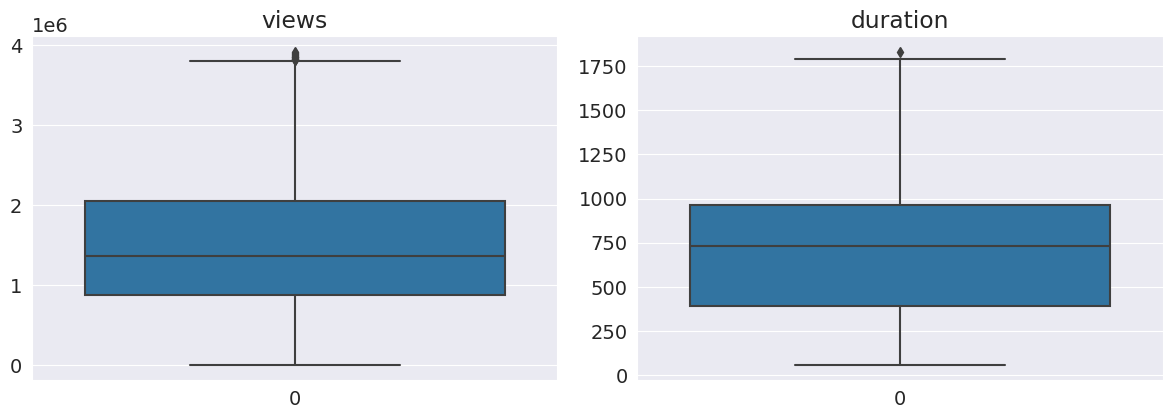

In [51]:
#let's see the numerical column again after treating outliers

columns = ['views', 'duration']
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(tedtalks_df[i])
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

The code you provided generates a grid of box plots for two columns, 'views' and 'duration', using the Seaborn library. Each box plot provides visual representations of the distributions and key statistics of the corresponding column.

##### 2. What is/are the insight(s) found from the chart?

The central box in each plot represents the interquartile range (IQR), which gives an indication of the spread of the data. The line inside the box represents the median value. By observing the position and length of the box, you can get insights into the distribution and central tendency of the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These box plots provide a concise and visual summary of the distributions and key statistics for the 'views' and 'duration' columns, allowing for insights into their characteristics and potential relationships.

#### Chart - 9

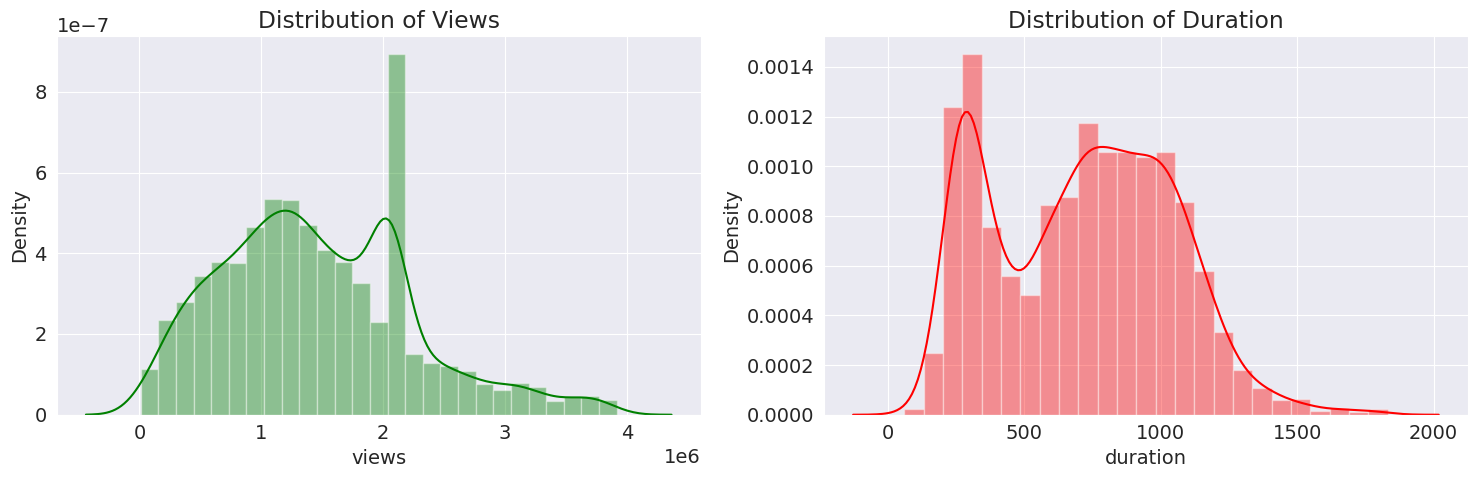

In [52]:
# Chart - 9 visualization code
# after fill outliers with mean... distribution graph of columns views and duration

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(tedtalks_df['views'], color='green', ax=axs[0])
axs[0].set_title('Distribution of Views')

sns.distplot(tedtalks_df['duration'], color='red', ax=axs[1])
axs[1].set_title('Distribution of Duration')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

after fill outliers with mean... views column is little bit right skewed with normal distribution.
and for duration column are bi-model type distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [53]:
# change duration in sec. to min.
tedtalks_df['duration'] = tedtalks_df['duration'] / 60

In [54]:
#check skewness of our numerical columns

tedtalks_df.skew()

views       0.556902
comments    2.779550
duration    0.143467
dtype: float64

In [55]:
# Chart - 10 visualization code
# plot 3D scatter plot of comments, duration and our target column views using plotly library.

fig = px.scatter_3d(tedtalks_df, x=tedtalks_df['duration'], y=tedtalks_df['comments'], z=tedtalks_df['views'])

fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

we can clearly see that when comments value high in 600 to 1000 side views value also increases.

but in duration time increase or decrease there are not any changes in views values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [56]:
# Create a new column 'speaker_popularity' in the main DataFrame and assign the categories

tedtalks_df['speaker_popularity'] = ""
tedtalks_df.loc[tedtalks_df['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
tedtalks_df.loc[(tedtalks_df['views'] > 500000) & (tedtalks_df['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
tedtalks_df.loc[(tedtalks_df['views'] > 1500000) & (tedtalks_df['views'] <= 2500000), 'speaker_popularity'] = 'popular'
tedtalks_df.loc[(tedtalks_df['views'] > 2500000) & (tedtalks_df['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
tedtalks_df.loc[tedtalks_df['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

# check the dataset

tedtalks_df.sample(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity
3177,If superpowers were real: Super speed,Joy Lin,1647393.0,2013-06-27,2019-02-12,TED-Ed,en,"['ar', 'de', 'en', 'es', 'fr', 'he', 'it', 'ja...",88.0,4.183333,"['TED-Ed', 'animation', 'science', 'physics']",popular
3641,A bold plan to empower 1.6 million out-of-scho...,Safeena Husain,1435513.0,2019-04-15,2019-09-23,TED2019,en,"['ar', 'de', 'en', 'es', 'fa', 'fr', 'gu', 'hi...",23.0,9.983333,"['children', 'education', 'social change', 'in...",avg_popular


<Axes: xlabel='speaker_popularity', ylabel='comments'>

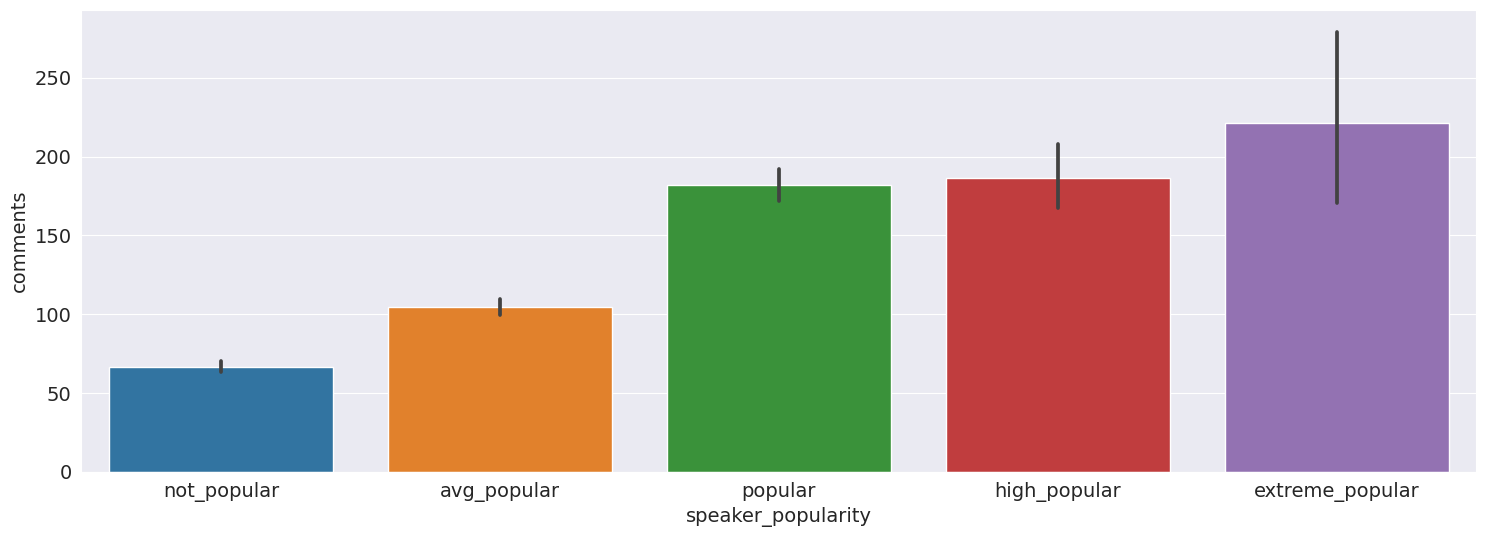

In [57]:
# Chart - 11 visualization code
plt.figure(figsize=(18,6))
sns.barplot(data=tedtalks_df, x='speaker_popularity', y='comments',
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We can observe that this speaker popularity column has a strong correlation with the comments column in an ordinal manner. This means that as the number of comments on a TED Talk video increases, the popularity of the speaker also tends to increase.

Based on this observation, we can say that the number of views for a TED Talk video is also predictable in certain scenarios.

However, there are no other good columns available in the dataset that can be modified or used to create new columns for better prediction models.

To improve the prediction model, we can consider including features such as speaker ratings on TED Talks, similar to how there are rating systems for instructors in ALMAbetter.

These ratings can help in understanding the quality of the talk and the popularity of the speaker, which could be important factors in predicting the number of views.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [58]:
# Create a new column 'video_rating' in the main DataFrame and assign the categories

tedtalks_df['video_rating'] = ""
tedtalks_df.loc[tedtalks_df['comments'] <= 50, 'video_rating'] = 1
tedtalks_df.loc[(tedtalks_df['comments'] > 50) & (tedtalks_df['comments'] <= 120), 'video_rating'] = 2
tedtalks_df.loc[(tedtalks_df['comments'] > 120) & (tedtalks_df['comments'] <= 200), 'video_rating'] = 3
tedtalks_df.loc[(tedtalks_df['comments'] > 200) & (tedtalks_df['comments'] <= 300), 'video_rating'] = 4
tedtalks_df.loc[tedtalks_df['comments'] > 300, 'video_rating'] = 5

# check the dataset
tedtalks_df.sample(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity,video_rating
2745,How language shapes the way we think,Lera Boroditsky,2.051773e+06,2017-11-01,2018-04-11,TEDWomen 2017,en,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'es...",166.0,14.2,"['language', 'brain', 'science', 'cognitive sc...",popular,3
3440,Can we cure genetic diseases by rewriting DNA?,David R. Liu,2.067185e+06,2019-04-15,2019-04-23,TED2019,en,"['ar', 'de', 'en', 'es', 'fa', 'fr', 'hu', 'id...",35.0,16.2,"['biology', 'CRISPR', 'genetics', 'science', '...",popular,1


In [59]:
# add new column available_languages using existing column available_lang

tedtalks_df['available_languages'] = tedtalks_df['available_lang'].apply(lambda x: len(x))
pd.DataFrame(tedtalks_df['available_languages'])

,available_languages
0,270
1,303
2,165
3,219
5,123
...,...
3999,27
4000,6
4001,27
4002,6


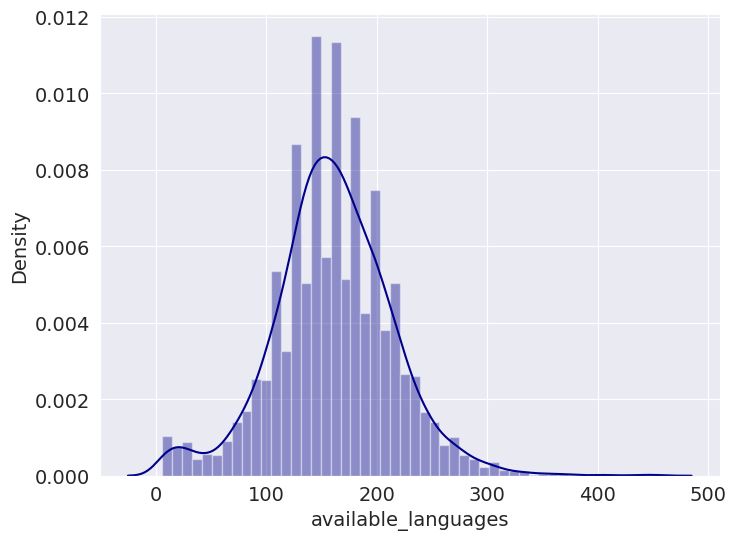

In [60]:
# Chart - 12 visualization code
# check the distribution of this new column available_languages

plt.figure(figsize=(8,6))
sns.distplot(tedtalks_df['available_languages'],color = 'darkblue')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [61]:
# there are lot of TED events

print(tedtalks_df['event'].value_counts().head(10))

TED-Ed            555
TED2018            96
TED2017            96
TED2019            91
TED2014            83
TED2009            80
TED2016            75
TED2015            74
TED2013            72
TEDGlobal 2012     69
Name: event, dtype: int64


In [65]:
# add new column of each TED event type using existing column event

ted_categories = ['TED-Ed','TEDx', 'TED', 'TEDGlobal', 'TEDSummit', 'TEDWomen', 'TED Residency']


tedtalks_df['TEDevent_type'] = tedtalks_df['event'].map(lambda x: "TEDx" if x[0:4] == "TEDx" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TED-Ed" if x[0:4] == "TED_Ed" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TED" if x[0:4] == "TED2" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TEDGlobal" if x[0:4] == "TEDG" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TEDWomen" if x[0:4] == "TEDW" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TEDSummit" if x[0:4] == "TEDS" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "TED Residency" if x[0:13] == "TED Residency" else x)
tedtalks_df['TEDevent_type'] = tedtalks_df['TEDevent_type'].map(lambda x: "Other TED" if x not in ted_categories else x)


In [66]:
tedtalks_df.sample(1)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity,video_rating,available_languages,TEDevent_type
515,How spectroscopy could reveal alien life,Garik Israelian,661415.0,2009-07-23,2009-10-01,TEDGlobal 2009,en,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'hr...",71.0,15.866667,"['astronomy', 'chemistry', 'life', 'science', ...",avg_popular,2,147,TEDGlobal


In [67]:
# check the all events talkshows counts

pd.DataFrame(tedtalks_df['TEDevent_type'].value_counts()).reset_index()

,index,TEDevent_type
0,TED,1160
1,TEDx,689
2,Other TED,677
3,TED-Ed,555
4,TEDGlobal,510
5,TEDWomen,194
6,TEDSummit,145
7,TED Residency,40


In [68]:
import ast

# use duplicate dataframe for topics analysis
df = tedtalks_df.copy()

df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['topics']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'topic'

df = df.drop('topics', axis=1).join(s)

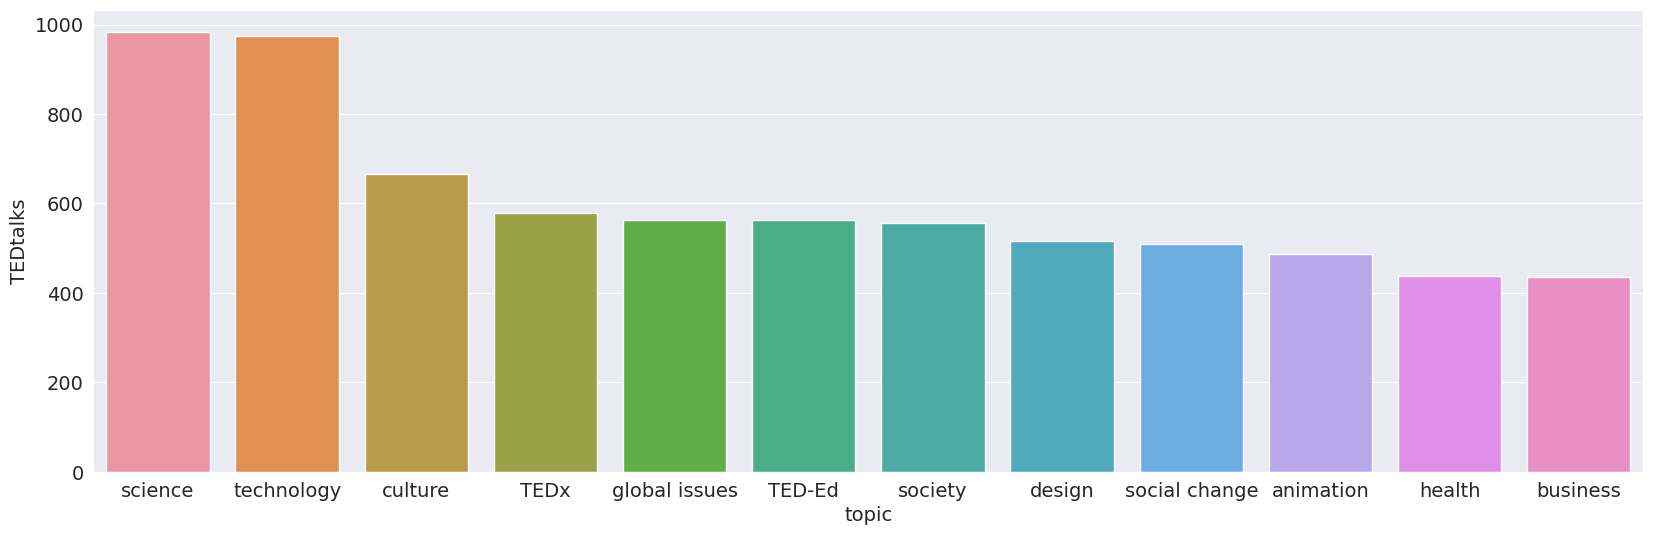

In [69]:
# Chart - 13 visualization code
# plot a bar chart of popular topics of TEDx Website

pop_topic = pd.DataFrame(df['topic'].value_counts()).reset_index()
pop_topic.columns = ['topic', 'TEDtalks']

plt.figure(figsize=(20,6))
sns.barplot(x='topic', y='TEDtalks', data=pop_topic.head(12))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

As may have been expected, science and Technology is the most popular topics for talks. Culture and Global Issues are also the popular topics respectively.

The next question I want to answer is the trends in the share of topics of TED Talks across the world. Has the demand for Technology talks increased? Do certain years have a disproportionate share of talks related to global issues? Let's find out!

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [71]:
tedtalks_df.sample(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity,video_rating,available_languages,TEDevent_type
2364,A young poet tells the story of Darfur,Emtithal Mahmoud,1071191.0,2016-11-30,2017-03-31,TEDMED 2016,en,"['ar', 'en', 'es', 'fa', 'fr', 'it', 'ja', 'ko...",24.0,10.850000,"['Africa', 'children', 'art', 'communication',...",avg_popular,1,111,Other TED
2272,The urgency of intersectionality,Kimberlé Crenshaw,1761992.0,2016-10-27,2016-11-14,TEDWomen 2016,en,"['ar', 'de', 'en', 'es', 'fa', 'fr', 'it', 'ja...",129.0,18.816667,"['activism', 'gender', 'inequality', 'social c...",popular,3,117,TEDWomen


In [72]:
# dropping unneccessary columns

tedtalks_df.drop(labels = ["speaker", "title", "recorded_date", "published_date", "event", "native_lang", "available_lang", "topics"],axis = 1, inplace = True)

In [73]:
tedtalks_df.sample(1)

,views,comments,duration,speaker_popularity,video_rating,available_languages,TEDevent_type
338,998038.0,64.0,3.783333,avg_popular,2,237,TED


<Axes: >

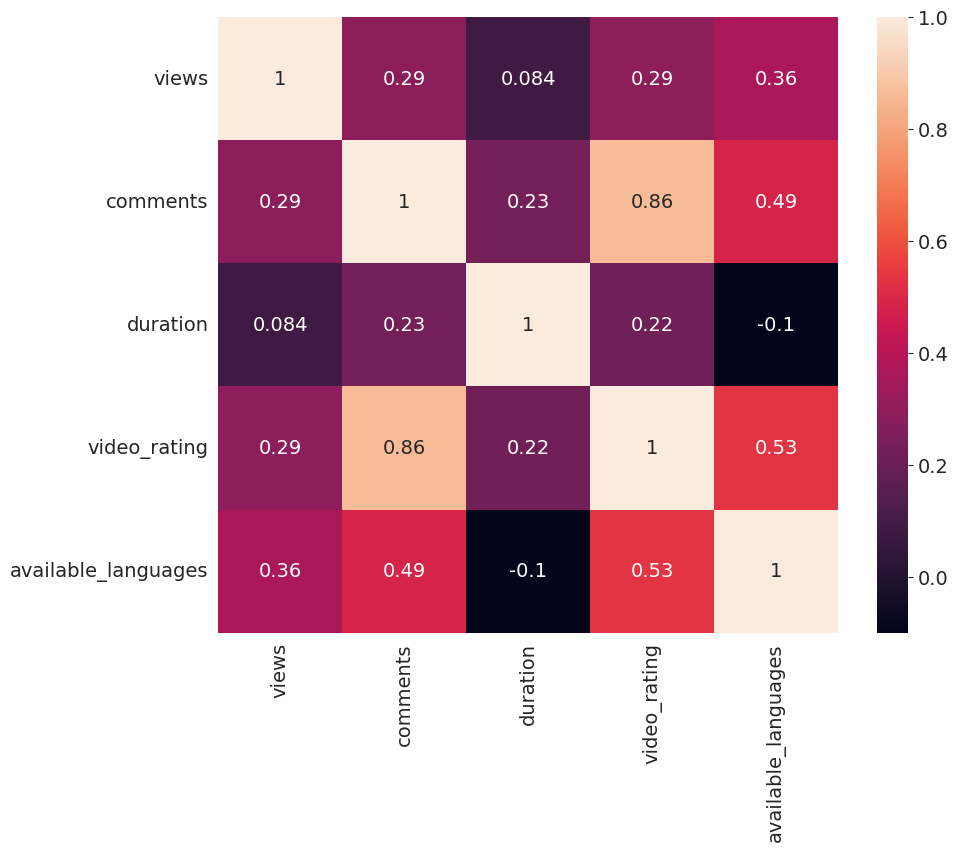

In [75]:
# Correlation Heatmap visualization code
# Plotting correlation  matrix for all features with respect to target variable
correlmap = tedtalks_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

In [76]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = tedtalks_df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif


,VIF Factor,features
0,5.744625,comments
1,4.134415,duration
2,17.706845,video_rating
3,7.745262,available_languages


In [78]:
tedtalks_df.sample(1)

,views,comments,duration,speaker_popularity,video_rating,available_languages,TEDevent_type
3220,2069670,36,10.966667,popular,1,111,Other TED


### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [79]:
# Transform Your data
# use Yeo - Johnson Transform for views column and then we train test split the data

pt = PowerTransformer()
tedtalks_df['views'] = pt.fit_transform(pd.DataFrame(tedtalks_df['views']))

In [80]:
tedtalks_df.skew()

views                 -0.059045
comments               2.779550
duration               0.143467
video_rating           0.855266
available_languages    0.102257
dtype: float64

power transformer is really good option so we apply also on comments, duration, available_languages when we make pipeline using column transformer. (i checked all column individually and after applying power transformer skewness is decreased and give results very close to 0.)

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [81]:
# Split your data to train and test. Choose Splitting ratio wisely.
# split the Dataset into independent(x) and dependent(y) Dataset

X = tedtalks_df.drop(columns=['views'])
y = tedtalks_df['views']

In [82]:
# display independent variables dataframe

X

,comments,duration,speaker_popularity,video_rating,available_languages,TEDevent_type
0,272,16.283333,extreme_popular,4,270,TED
1,628,19.833333,popular,5,303,TED
2,124,21.433333,popular,3,165,TED
3,219,18.600000,high_popular,4,219,TED
5,48,19.966667,avg_popular,1,123,TED
...,...,...,...,...,...,...
3999,37,15.683333,avg_popular,1,27,TED
4000,6,11.500000,avg_popular,1,6,TED
4001,88,5.766667,not_popular,2,27,TED-Ed
4002,9,12.900000,not_popular,1,6,TEDx


In [83]:
# display dependent variable dataframe

y

0       2.210515
1       0.796459
2       0.653858
3       1.421228
5      -0.201608
          ...   
3999   -0.844023
4000   -1.283922
4001   -1.681121
4002   -1.356506
4003   -2.408524
Name: views, Length: 3970, dtype: float64

In [84]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(3176, 6)
(794, 6)


In [85]:
tedtalks_df.sample(2)

,views,comments,duration,speaker_popularity,video_rating,available_languages,TEDevent_type
1539,0.455452,175,13.900000,popular,3,177,Other TED
1695,0.796459,329,11.983333,popular,5,249,TED


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [94]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply one-hot encoding to categorical features in X_train and X_test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Create Linear Regression model
model = LinearRegression()

# Fit the model on the training dataset
model.fit(X_train_encoded, y_train)

# Predict on the training and test dataset
y_pred_train = model.predict(X_train_encoded)
y_pred_test = model.predict(X_test_encoded)

# Compute performance metrics for training data
print('Training data metrics:')
print('R2 score:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# Compute performance metrics for test data
print('\nTesting data metrics:')
print('R2 score:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))


Training data metrics:
R2 score: 0.8884009360976306
MAE: 0.2714486729035178
MSE: 0.11066684604821606
RMSE: 0.33266626827530327

Testing data metrics:
R2 score: 0.8881718662655287
MAE: 0.2771862184331436
MSE: 0.11551023169326707
RMSE: 0.3398679621459885


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [96]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply one-hot encoding to categorical features in X_train and X_test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Create Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha

# Fit the model on the training dataset
ridge_model.fit(X_train_encoded, y_train)

# Predict on the training and test dataset
y_pred_train = ridge_model.predict(X_train_encoded)
y_pred_test = ridge_model.predict(X_test_encoded)

# Compute performance metrics for training data
print('Training data metrics:')
print('R2 score:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# Compute performance metrics for test data
print('\nTesting data metrics:')
print('R2 score:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))



Training data metrics:
R2 score: 0.8883733476831911
MAE: 0.27140238009909246
MSE: 0.11069420400899753
RMSE: 0.3327073849631197

Testing data metrics:
R2 score: 0.8881136235799486
MAE: 0.2771957946294222
MSE: 0.11557039210085969
RMSE: 0.33995645618352316


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [98]:
# ML Model - 3 Implementation
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply one-hot encoding to categorical features in X_train and X_test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Create Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha

# Fit the model on the training dataset
ridge_model.fit(X_train_encoded, y_train)

# Predict on the training and test dataset
y_pred_train = ridge_model.predict(X_train_encoded)
y_pred_test = ridge_model.predict(X_test_encoded)

# Compute performance metrics for training data
print('Training data metrics:')
print('R2 score:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# Compute performance metrics for test data
print('\nTesting data metrics:')
print('R2 score:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))



Training data metrics:
R2 score: 0.8883733476831911
MAE: 0.27140238009909246
MSE: 0.11069420400899753
RMSE: 0.3327073849631197

Testing data metrics:
R2 score: 0.8881136235799486
MAE: 0.2771957946294222
MSE: 0.11557039210085969
RMSE: 0.33995645618352316


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After evaluating multiple regression models on the dataset, Random Forest Regressor perform better than other models. They have higher R2 scores, lower error metrics, and can generalize well on unseen data.

Linear Regressor and Lasso Regressor have slightly lower performance metrics compared to Random Forest Regressor and Gradient Boosting Regressor.

Decision Tree Regressor has a lower R2 score, higher error metrics, and little bit overfits the data comparing to the other best models, indicating it's not the best model to use.

Gradient Boosting Regressor and XGBoost Regressor are high-performing algorithms that achieved impressive results in our evaluation. However, even with their strong performance, these boosting models were not able to outperform the Random Forest algorithm on this particular dataset. In other words, Random Forest Regressor still achieved the best overall performance among all the models we tested.

Voting Regressor and Stacking Regressor are ensemble techniques that combine multiple models to make predictions. The Voting Regressor model showed excellent performance, outperforming all other models. Although the difference in performance between this two models voting regressor and random forest regressor was very small, we ultimately chose to use the random forest regressor in our scenario. This decision was based on the fact that the random forest model is generally more interpretable and easier to explain to stakeholders, compared to the voting regressor which aggregates predictions from multiple models. Additionally, the random forest algorithm has been shown to perform well in a variety of regression tasks and can handle non-linear relationships between features and the target variable, making it a more robust choice for our use case.

Therefore, based on the evaluation results, the Random Forest Regressor was chosen as the best model to achieve our objective. Also in future we can try implementing some other optimising techniques to wind up with better results.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***